In [171]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 


# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path) 

# Combine the data into a single dataset and cleaning data
mouse = pd.merge(mouse_metadata,study_results,on=["Mouse ID"])
mouse = mouse.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = False) 
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Count mouse 
mouse["Mouse ID"].nunique()

249

In [4]:
#Summary Stats
Drugs = mouse.groupby("Drug Regimen")  
x = Drugs["Tumor Volume (mm3)"].mean() 
y = Drugs["Tumor Volume (mm3)"].median() 
z = Drugs["Tumor Volume (mm3)"].var() 
a = Drugs["Tumor Volume (mm3)"].std()  
b = Drugs["Tumor Volume (mm3)"].sem()  

sumstats = pd.DataFrame({"Mean Tumor Volume": x,"Median Tumor Volume": y,"Tumor Volume Variance":z,"Tumor Volume Std. Dev.":a,"Tumor Volume Std. Err.":b})

In [5]:
sumstats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Mouses per Drug')

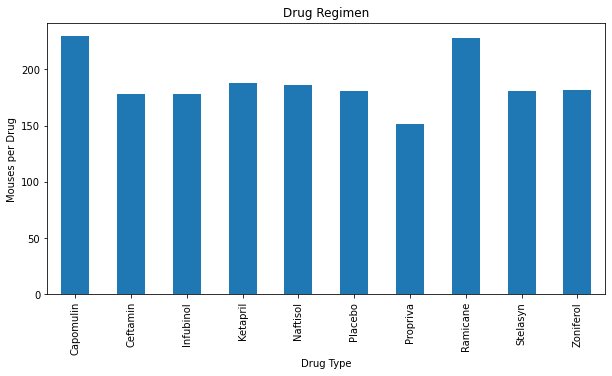

In [6]:
# Using Pandas to plot drug reg.
drugplotpoints = Drugs["Mouse ID"].count() 
drugplotpoints.plot(kind="bar",figsize=(10,5)) 
plt.title("Drug Regimen")
plt.xlabel("Drug Type")
plt.ylabel("Mouses per Drug") 


<Figure size 1440x360 with 0 Axes>

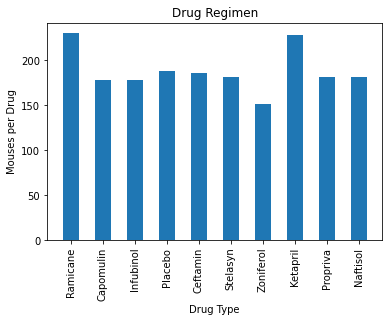

<Figure size 1440x360 with 0 Axes>

In [7]:
#Using mat plot to plot drug reg.
x_axis = mouse["Drug Regimen"].unique()
x_axis 
y_axis = Drugs["Mouse ID"].count()  
y_axis 

 
plt.title("Drug Regimen")
plt.xlabel("Drug Type")
plt.ylabel("Mouses per Drug") 
plt.bar(x_axis, y_axis,alpha=1, align='center',width = .5)
plt.xticks(rotation="vertical")
plt.figure(figsize=(20, 5))

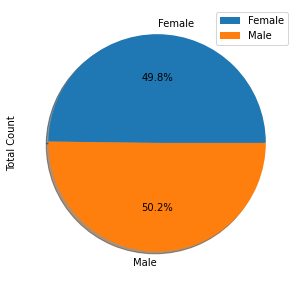

In [8]:
#Using Pandas for pie chart 

gendermice = mouse.groupby(["Mouse ID","Sex"]) 
mouse_gender_df = pd.DataFrame(gendermice.size())
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"] 
mouse_gender.plot.pie(y= 'Total Count',figsize=(5,5),shadow = True, autopct="%1.1f%%")

(-1.1016567410624358,
 1.1000789182960846,
 -1.1009310601339266,
 1.1017615853311924)

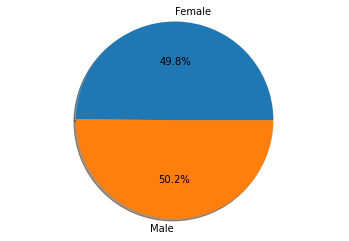

In [9]:
#Using Mat plot lib for pie chart 

values = [49.8, 50.2]
labels = ["Female","Male"]
plt.pie(values,autopct="%1.1f%%", shadow=True,labels=labels) 

plt.axis("equal")

In [386]:
drugs = mouse.groupby('Mouse ID').max()['Timepoint']

drugs = pd.DataFrame(drugs)
drugs = pd.merge(drugs, mouse, on=("Mouse ID","Timepoint"),how="left")
x = drugs 
x

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a262,45,Placebo,Female,17,29,70.717621,4
a275,45,Ceftamin,Female,20,28,62.999356,3
a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...
z435,10,Propriva,Female,12,26,48.710661,0
z578,45,Ramicane,Male,11,16,30.638696,0
z581,45,Infubinol,Female,24,25,62.754451,3


In [379]:
# Filering my data toward the specfied drugs
Capomulin = x.loc[x["Drug Regimen"] == "Capomulin"] 
Ramicane = x.loc[x["Drug Regimen"] == "Ramicane"] 
Infubinol = x.loc[x["Drug Regimen"] == "Infubinol"] 
Ceftamin = x.loc[x["Drug Regimen"] == "Ceftamin"] 


In [380]:
# Quartile analysis for each drug
#Capomulin
quartiles = Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Capomulin.")
print(f"Values above {upper_bound} could be outliers for Capomulin.") 

Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.


In [381]:
#Ramicane
quartiles = Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ramicane.")
print(f"Values above {upper_bound} could be outliers for Ramicane.")  

Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.


In [382]:
#Infubinol
quartiles = Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Infubinol.")
print(f"Values above {upper_bound} could be outliers for Infubinol.")  

Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.


In [383]:
#Ceftamin 
quartiles = Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ceftamin.")
print(f"Values above {upper_bound} could be outliers for Ceftamin.")  

Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


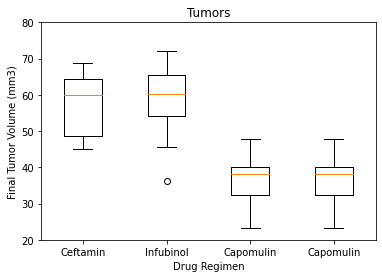

In [384]:
data = [Ceftamin["Tumor Volume (mm3)"], Infubinol["Tumor Volume (mm3)"], Capomulin["Tumor Volume (mm3)"], Capomulin["Tumor Volume (mm3)"]]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data, labels=["Ceftamin","Infubinol","Capomulin","Capomulin"])

plt.ylim(20,80)
plt.show()

In [385]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

In [318]:
#List of Mouse Id's to select from
Capomulin

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,45,Capomulin,Female,9,22,38.982878,2
b742,45,Capomulin,Male,7,21,38.939633,0
f966,20,Capomulin,Male,16,17,30.485985,0
g288,45,Capomulin,Male,3,19,37.074024,1
g316,45,Capomulin,Female,22,22,40.159220,2
i557,45,Capomulin,Female,1,24,47.685963,1
i738,45,Capomulin,Female,23,20,37.311846,2
j119,45,Capomulin,Female,7,23,38.125164,1
j246,35,Capomulin,Female,21,21,38.753265,1


In [338]:
#Selecting mouse ID for capomulin drug
Mouse_Id = input(f'Insert one of following mouse ids ') 

Insert one of following mouse ids y793


In [342]:
#Getting data for x and y axes
Timepoint = mouse.loc[Mouse_Id,["Timepoint"]] 

Tumorvol = mouse.loc[Mouse_Id,["Tumor Volume (mm3)"]] 

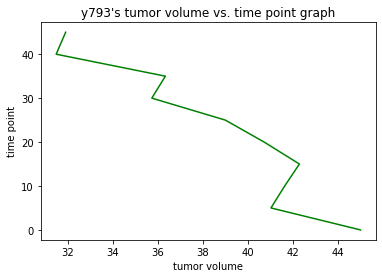

In [345]:
#Plot Chart
plt.plot(Tumorvol, Timepoint, color="green") 


plt.title(Mouse_Id + "'s tumor volume vs. time point graph")
plt.xlabel("tumor volume")

plt.ylabel("time point")


plt.show()

In [347]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

In [354]:
#Get data for both axes
Capoweight = Capomulin.loc[:,"Weight (g)"] 
Capovol =  Capomulin.loc[:,"Tumor Volume (mm3)"] 

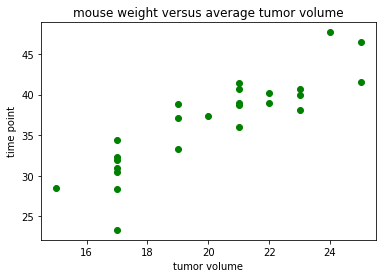

In [355]:
#Plot chart
plt.scatter(Capoweight, Capovol, color="green") 


plt.title("mouse weight versus average tumor volume")
plt.xlabel("tumor volume")

plt.ylabel("time point")


plt.show()

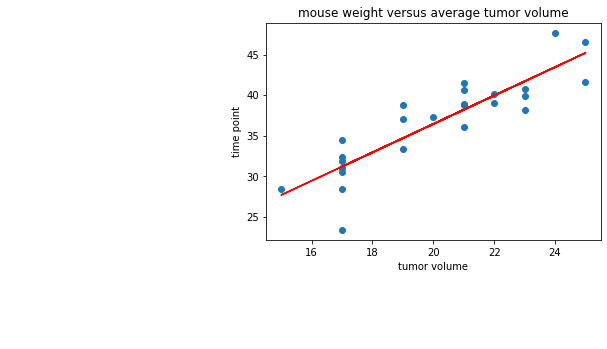

In [393]:
#Plot linear Regression
from scipy.stats import linregress

x_values = Capoweight
y_values = Capovol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.title("mouse weight versus average tumor volume")
plt.xlabel("tumor volume")
plt.ylabel("time point")
plt.show()